In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Statistics

In [2]:
mean = 0
sigma = 1

val = 0.19
print('For a value of ' + str(val) +', the probability is ' + str(stats.norm.cdf(val, loc = mean, scale = sigma)) + '.')

# CDF stands for "cumulative distribution function"- in our  case this finds the probability of have a value less than 'val' (0.19) by integrating a normal function below this point.
# The normal (Gaussian) function is used because this is a standard, well-known (and well characterizable) analytic function that we can compare other types of functions to to get an
# idea of how values on one compare to well-known probabilities. Generally we compare to Gaussians of mean 0 and sigma 1, in which case the values correlating probabilities to specific
# sigmas are tabulated in a Z table.

# The answer is the number you find on a Z table, i.e. look up 0.19 on the sigma (column/row headers) to get the probability .5735.
# This answer is the probability associated with 0.19 sigma.

For a value of 0.19, the probability is 0.5753454347347955.


In [3]:
val = 1.65
print('For a value of ' + str(val) +', the probability is ' + str(stats.norm.cdf(val, loc = mean, scale = sigma)) + '.')
val = .34
print('For a value of ' + str(val) +', the probability is ' + str(stats.norm.cdf(val, loc = mean, scale = sigma)) + '.')

# Both of the above values match the Z table.

For a value of 1.65, the probability is 0.9505285319663519.
For a value of 0.34, the probability is 0.6330717360360281.


In [4]:
percent = .33
print('The sigma for a probability of ' + str(percent) + ' is ' + str(stats.norm.ppf(percent, loc = mean, scale = sigma)) + '.')

# The ppf function used here reverses the cdf function.
# This answer is the value you "input" from a Z table, i.e. look up -.44 for sigma associated with .33 probability.
# This is the sigma associated with .33 probability.

The sigma for a probability of 0.33 is -0.4399131656732338.


In [5]:
percent = .5735
print('The sigma for a probability of ' + str(percent) + ' is ' + str(stats.norm.ppf(percent, loc = mean, scale = sigma)) + '.')

# This is the inverse of the first operation (cdf on a value of 0.19) rounded.

The sigma for a probability of 0.5735 is 0.18529201588789962.


### Rayleigh Distribution

Rayleigh distributions are common when vector magnitueds are related to their direction, such as wind speed. Unlike a Gaussian, it is only positive values and has a longer "tail" on one side than the other.

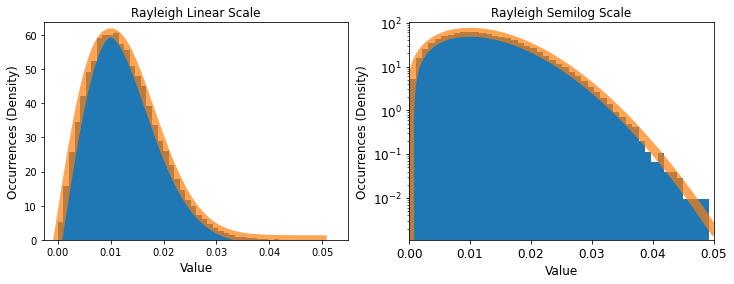

In [6]:
points = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 100000)
x = np.linspace(0, .05, 1000)

fig, ax = plt.subplots(1, 2, figsize=(12,4))
plt.xlim([0, .05])
plt.tick_params(labelsize = 12)

ax[0].hist(points, 50, density = True)
ax[0].set_ylabel("Occurrences (Density)", fontsize = 12)
ax[0].set_xlabel("Value", fontsize = 12)
ax[0].plot(x, stats.rayleigh.pdf(x, loc = 0, scale = .01), linewidth = 9, alpha = .7)
ax[0].set_title("Rayleigh Linear Scale")

ax[1].hist(points, 50, density = True)
ax[1].set_ylabel("Occurrences (Density)", fontsize = 12)
ax[1].set_xlabel("Value", fontsize = 12)
ax[1].semilogy(x, stats.rayleigh.pdf(x, loc = 0, scale = .01), linewidth = 9, alpha = .7)
ax[1].set_title("Rayleigh Semilog Scale")

plt.show()

Statistical Question: What is the chance that the data at the value I am looking for a signal at (.028) is due to random variations as opposed to a real signal?

Method:<br>
Integrate Rayleigh pdf from hypothetical value to infinity (to the right of the hypothetical value) to get probability of noise giving this signal- $ P(x) =  \int_{0.28}^{\infty} pdf(x)\,dx $. Alternatively, could do $ P(x) = 1 - \int_{-\infty}^{0.28} pdf(x)\,dx $ due to normalization.<br>
Then compare to Xσ from normal distribution.

In [7]:
hyp_val = .028

prob = 1 - stats.rayleigh.cdf(hyp_val, loc = 0, scale = 0.01)
print('The probability of getting ' + str(hyp_val) + ' is ' + str(prob) + '.')

# Alternatively, scipy also has a "survival function" method, which does essentially the same thing.

The probability of getting 0.028 is 0.019841094744370347.


To get the corresponding Xσ, we use the ppf function from earlier on the *normal* distribution function using the *rayleigh* probability found above. We use it on the normal distribution because we are comparing our probability to the normal distribution.

In [8]:
sigma = stats.norm.ppf(prob, loc = 0, scale = 1)
print("The sigma for a hypothetical value of .028 is " + str(sigma) + '.')

The sigma for a hypothetical value of .028 is -2.057041963792887.


In [9]:
hyp_val = .01

prob = 1 - stats.rayleigh.cdf(hyp_val, loc = 0, scale = 0.01)
sigma = stats.norm.ppf(prob, loc = 0, scale = 1)

print('For a hypothetical value of ' + str(hyp_val) + ', the probability is ' + str(prob) + ' and the sigma is ' + str(sigma) + '.')

For a hypothetical value of 0.01, the probability is 0.6065306597126334 and the sigma is 0.27028802073873587.


In [10]:
hyp_val = .005

prob = 1 - stats.rayleigh.cdf(hyp_val, loc = 0, scale = 0.01)
sigma = stats.norm.ppf(prob, loc = 0, scale = 1)

print('For a hypothetical value of ' + str(hyp_val) + ', the probability is ' + str(prob) + ' and the sigma is ' + str(sigma) + '.')

For a hypothetical value of 0.005, the probability is 0.8824969025845955 and the sigma is 1.1875615473802972.


As measurements get farther from the locus of the distribution, they get less likely, although in decreasing magnitude.<br>
Negative signs in the sigma come from the fact that opposite sides of the Gaussian are equally as likely but in opposite directions, i.e. above you can go 2σ above or below the mean, but the deviation from the mean on the below side is negative, whereas it is positive on the above side.

# Non-continuous distributions
### Binomial Distribution

The binomial distribution is a discrete plot of the number of successes in a fail/succeed binary system. The probability mass function (used below) plots the probability of getting x successes, using the parameters p for probability of a single success and n for number of trials.

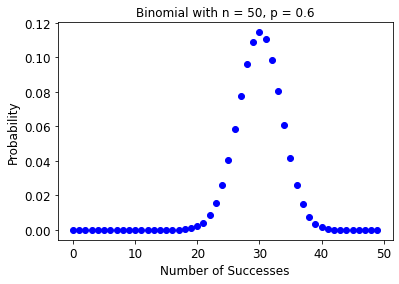

In [11]:
n = 50
p = .6

fig, ax = plt.subplots(1, 1)
x = np.arange(0, 50, 1)
y = stats.binom.pmf(x, n, p, loc = 0)

plt.tick_params(labelsize = 12)
ax.set_ylabel('Probability', fontsize = 12)
ax.set_xlabel('Number of Successes', fontsize = 12)
ax.set_title("Binomial with n = " + str(n) + ", p = " + str(p))

ax.plot(x, y, 'bo')

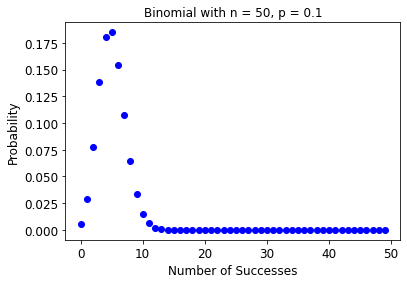

In [12]:
n = 50
p = .1

fig, ax = plt.subplots(1, 1)
x = np.arange(0, 50, 1)
y = stats.binom.pmf(x, n, p, loc = 0)

plt.tick_params(labelsize = 12)
ax.set_ylabel('Probability', fontsize = 12)
ax.set_xlabel('Number of Successes', fontsize = 12)
ax.set_title("Binomial with n = " + str(n) + ", p = " + str(p))

ax.plot(x, y, 'bo')

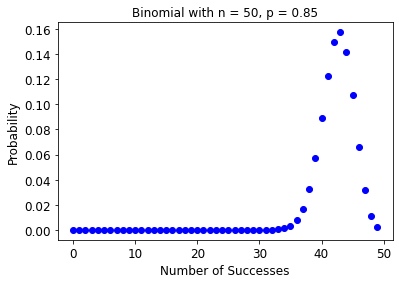

In [13]:
n = 50
p = .85

fig, ax = plt.subplots(1, 1)
x = np.arange(0, 50, 1)
y = stats.binom.pmf(x, n, p, loc = 0)

plt.tick_params(labelsize = 12)
ax.set_ylabel('Probability', fontsize = 12)
ax.set_xlabel('Number of Successes', fontsize = 12)
ax.set_title("Binomial with n = " + str(n) + ", p = " + str(p))

ax.plot(x, y, 'bo')

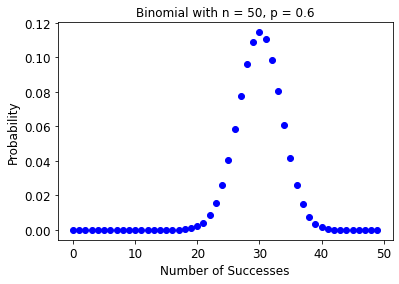

In [16]:
# Recreating first binomial plot

n = 50
p = .6

fig, ax = plt.subplots(1, 1)
x = np.arange(0, 50, 1)
y = stats.binom.pmf(x, n, p, loc = 0)

plt.tick_params(labelsize = 12)
ax.set_ylabel('Probability', fontsize = 12)
ax.set_xlabel('Number of Successes', fontsize = 12)
ax.set_title("Binomial with n = " + str(n) + ", p = " + str(p))

ax.plot(x, y, 'bo')

Statistical Question: What is the chance that a value of 36 or higher is due to random chance as opposed to a signal? <br>
Method: Sum probabilities of all values above the test value of 36, here using the cdf and ppf as before.

In [ ]:
n = 50
p = .6

prob = stats.binom.sf(36, n, p, loc = 0)
sigma = stats.norm.ppf(prob, loc = 0, scale = 1)

print('The probability of a value of 36 or higher is ' + str(prob) + ' and the associated sigma is ' + str(sigma) + '.')

Probabilities of all observed values are discrete, and the observed values themselves are discrete, so finding the probability above or below a certain point (where the integral from before has now become a sum of everything past the test point) will also be discrete. Hence the sigmas following from these values are discrete- they have to follow whatever probability is found. With continuous distributions you had a histogram which was matched with a continuous function that could have the same probability for a few observed values (because all of these observed values were fit in the same bin if they were close enough). With non-continuous distributions you should know exactly where the value belongs (because there is only certain allowed values), so you should be able to get a better idea of exactly where your value is in terms of its sigma.
<br>
<br>
The mean does not have to be one of the values observed because averaging gives the "in betweens" of observed values (e.g. the average of 1 and 2 is 1.5). Mean also does not change discretely in large data sets, because changing the number of occurrences of a single value will shift the mean based on that change, but as you increase the total number of occurrences, this shift becomes very small compared to the total, and so the mean moves nearly continuously between different values. This also means the standard deviation will be continuous because it is based off of the mean.